# Lab

## DSCI 561 Lab 3 - Question 2

*Usual lab instructions on submitting are here.*

## Grading Scheme (NEW!)

Many of you are familiar with the "Traditional Grading" model that is in place in most courses.
Briefly, this model involves earning (or losing) points on individual assessments throughout the course, and then a grade calculated by doing a "weighted-average" throughout the term.

You may be surprised to learn that this is not the only way classes can be structured, and there are alternative models that research has shown to be far better for learning, motivation, attitudes, and long-term benefit.
If you're interested in learning more details about the last sentence (and if it surprises you), I encourage you to [check out this very accessible paper](https://www.lifescied.org/doi/full/10.1187/cbe.cbe-14-03-0054) from Schinske and Tanner.

I am not quite ready to fully move away from Traditional Grading yet (mostly because of a lack of resources, otherwise I'm totally all-in!) but I'd like to experiment with a modified version of Specifications-Grading here in this course.
I'd love to hear your feedback on it!
Here are some [key features](https://twitter.com/siwelwerd/status/1472940473924960261) of Specifications Grading:

- Each assignment is accompanied with a clear list of "specifications" of what constitutes acceptable work at each level.
- Assignments are marked based on whether students have met each of the specifications for that assignment.
- Students are given multiple opportunities to revise their work to demonstrate their learning.

In this course, the image below shows a handy guide to help you understand this grading system: 

<img src="images/specifications_rubric.png" width="100%">

I prefer **not** to associate percentages or grades to the levels (I personally feel that this hampers your learning and poisons motivation and creativity), but I know that it will take us some time to eliminate grades completely.
If you must think of things in terms of numbers and percentages, you can expand the box below to see my best guess of what each level translates into.

Resist the temptation to click this button!

- The **E**, or "Excellent" level is about 100%.
- The **G**, or "Good" level is about 85%.
- The **R**, or "Revision Required"  level is < 50%.
- The **I** or "Incomplete" level is not associated with a number because it was not graded.

### Resubmission Policy

This term, you will be able to resubmit your work up to a maximum of 2 times after you have receive feedback.
Each time you do a resubmission, you will first need to reflect on your initial submission, and discuss how you corrected your work after receiving feedback from the TAs.

Your resubmission request can be submitted on Gradescoope but we reserve the right to decline your resubmission if the quality and depth of your reflection is not up to our specifications.


## Pre-requisite Knowledge

Before doing this lab, students should:

- be comfortable performing Exploratory Data Analysis (EDA).
- be able to perform the mechanics of performing linear regressions in R using the `tidyverse`.
- be able to identify collinearity and multi-collinearity in variables using a variety of methods (correlation matrix, correlogram, visualizations, variance inflation factor, etc...).

## Learning Intentions

- Implement a simple linear regression, and a multiple linear regression in the R programming language.

- Develop some *intuition* about the correlation ($R$), and assess whether there is collinearity between two variables.

- Use the Variable Inflation Factor (VIF) to determine whether multicollinearity exists in a regression analysis.

- Critically examine strategies for resolving multicollinearity in regression analyses (**focus of this lab**).

In [1]:
# Load libraries

# Adjust plot aspect ratio and apperance
library(repr)
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 400)

library("tidyverse")
library("moderndive")

suppressPackageStartupMessages({
  library("janitor")
  library("car")
  library("corrplot")
  library("ISLR")
  library("plotly")
  library("cowplot")
})

# Only display 10 rows of tibble
repr_html.tbl_df <- function(obj, ..., rows = 10) repr:::repr_html.data.frame(obj, ..., rows = rows)

# fit summary
fit_summary <- function(model) {
  tb <- broom::glance(model)
  tb <- tb |>
    add_column(r = sqrt(tb$r.squared), .before = "r.squared") |>
    rename(`R^2` = r.squared, R = r)
  return(round(tb, 3))
}
# Overwrite

regression_table <- function(model) {
  tbl <- get_regression_table(model) |> rename(beta = estimate)
  tbl <- tbl |> add_column(std_error_perc = abs(round(100 * tbl$std_error / tbl$beta, 2)))
  return(tbl)
}

## 2.0 - Introduction

In this question, you will continue your analysis of the `boston` dataset.
In question 1 of this lab, you have already done some exploratory data analysis of the `boston` dataset, but we are repeating the same introductory information here for completeness.

### Housing Values in Suburbs of Boston

This is an old dataset about house values in the suburbs of Boston in the year 1978.
It contains 14 columns, and 506 rows and each row indicates a different "town" in Boston.
`MEDV` is the median value of owner-occupied homes and is generally considered to be the response variable.

The columns and their descriptions are provided below:

| Original Column | Suggested Column Name | Description |
| ------ | ------- | ----------- |
|CRIM | crime | per capita crime rate by town|
|ZN | res | proportion of residential land zoned for lots over 25,000 sq.ft.|
|INDUS | industry | proportion of non-retail business acres per town|
|CHAS | river | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)|
|NOX | nox | nitric oxides concentration (parts per 10 million)|
|RM | rooms | average number of rooms per dwelling|
|AGE | age | proportion of owner-occupied units built prior to 1940|
|DIS | emp | weighted distances to five Boston employment centres|
|RAD | highway | index of accessibility to radial highways|
|TAX | tax | full-value property-tax rate per \$10,000|
|PTRATIO | teaching | pupil-teacher ratio by town|
|B | black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town|
|LSTAT | lower | Proportion of population that is lower status = 1/2 (proportion of adults without, some high school education and proportion of male workers classified as laborers). The logarithmic specification implies that socioeconomic status distinctions mean more in the upper brackets of society than in the lower classes |
|MEDV | price | Median value of owner-occupied homes. Data censored with a max of 50 (meaning $50,000) |

**N.B. I am intentionally giving you a flawed dataset for this lab so that you can carefully and critically consider some of the ethical questions that arise while working with this, and other data. If you feel that doing this lab would cause you harm (for instance, as a result of reliving personal trauma), please let me know and I'll provide you an alternative dataset.**

## 2.1 - Load the dataset

**Specifications**

- Load the dataset and bind it to a variable called `boston`.

In [2]:
# Your code here

boston <- read_csv("https://raw.githubusercontent.com/org-firasm/ubc_stats/main/class/week01/boston.csv", col_types = cols())

boston

crime,res,industry,river,nox,rooms,age,emp,highway,tax,teaching,black,lower,price
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24000
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21600
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34700
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33400
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36200
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21,391.99,9.67,22400
0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21,396.90,9.08,20600
0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21,396.90,5.64,23900


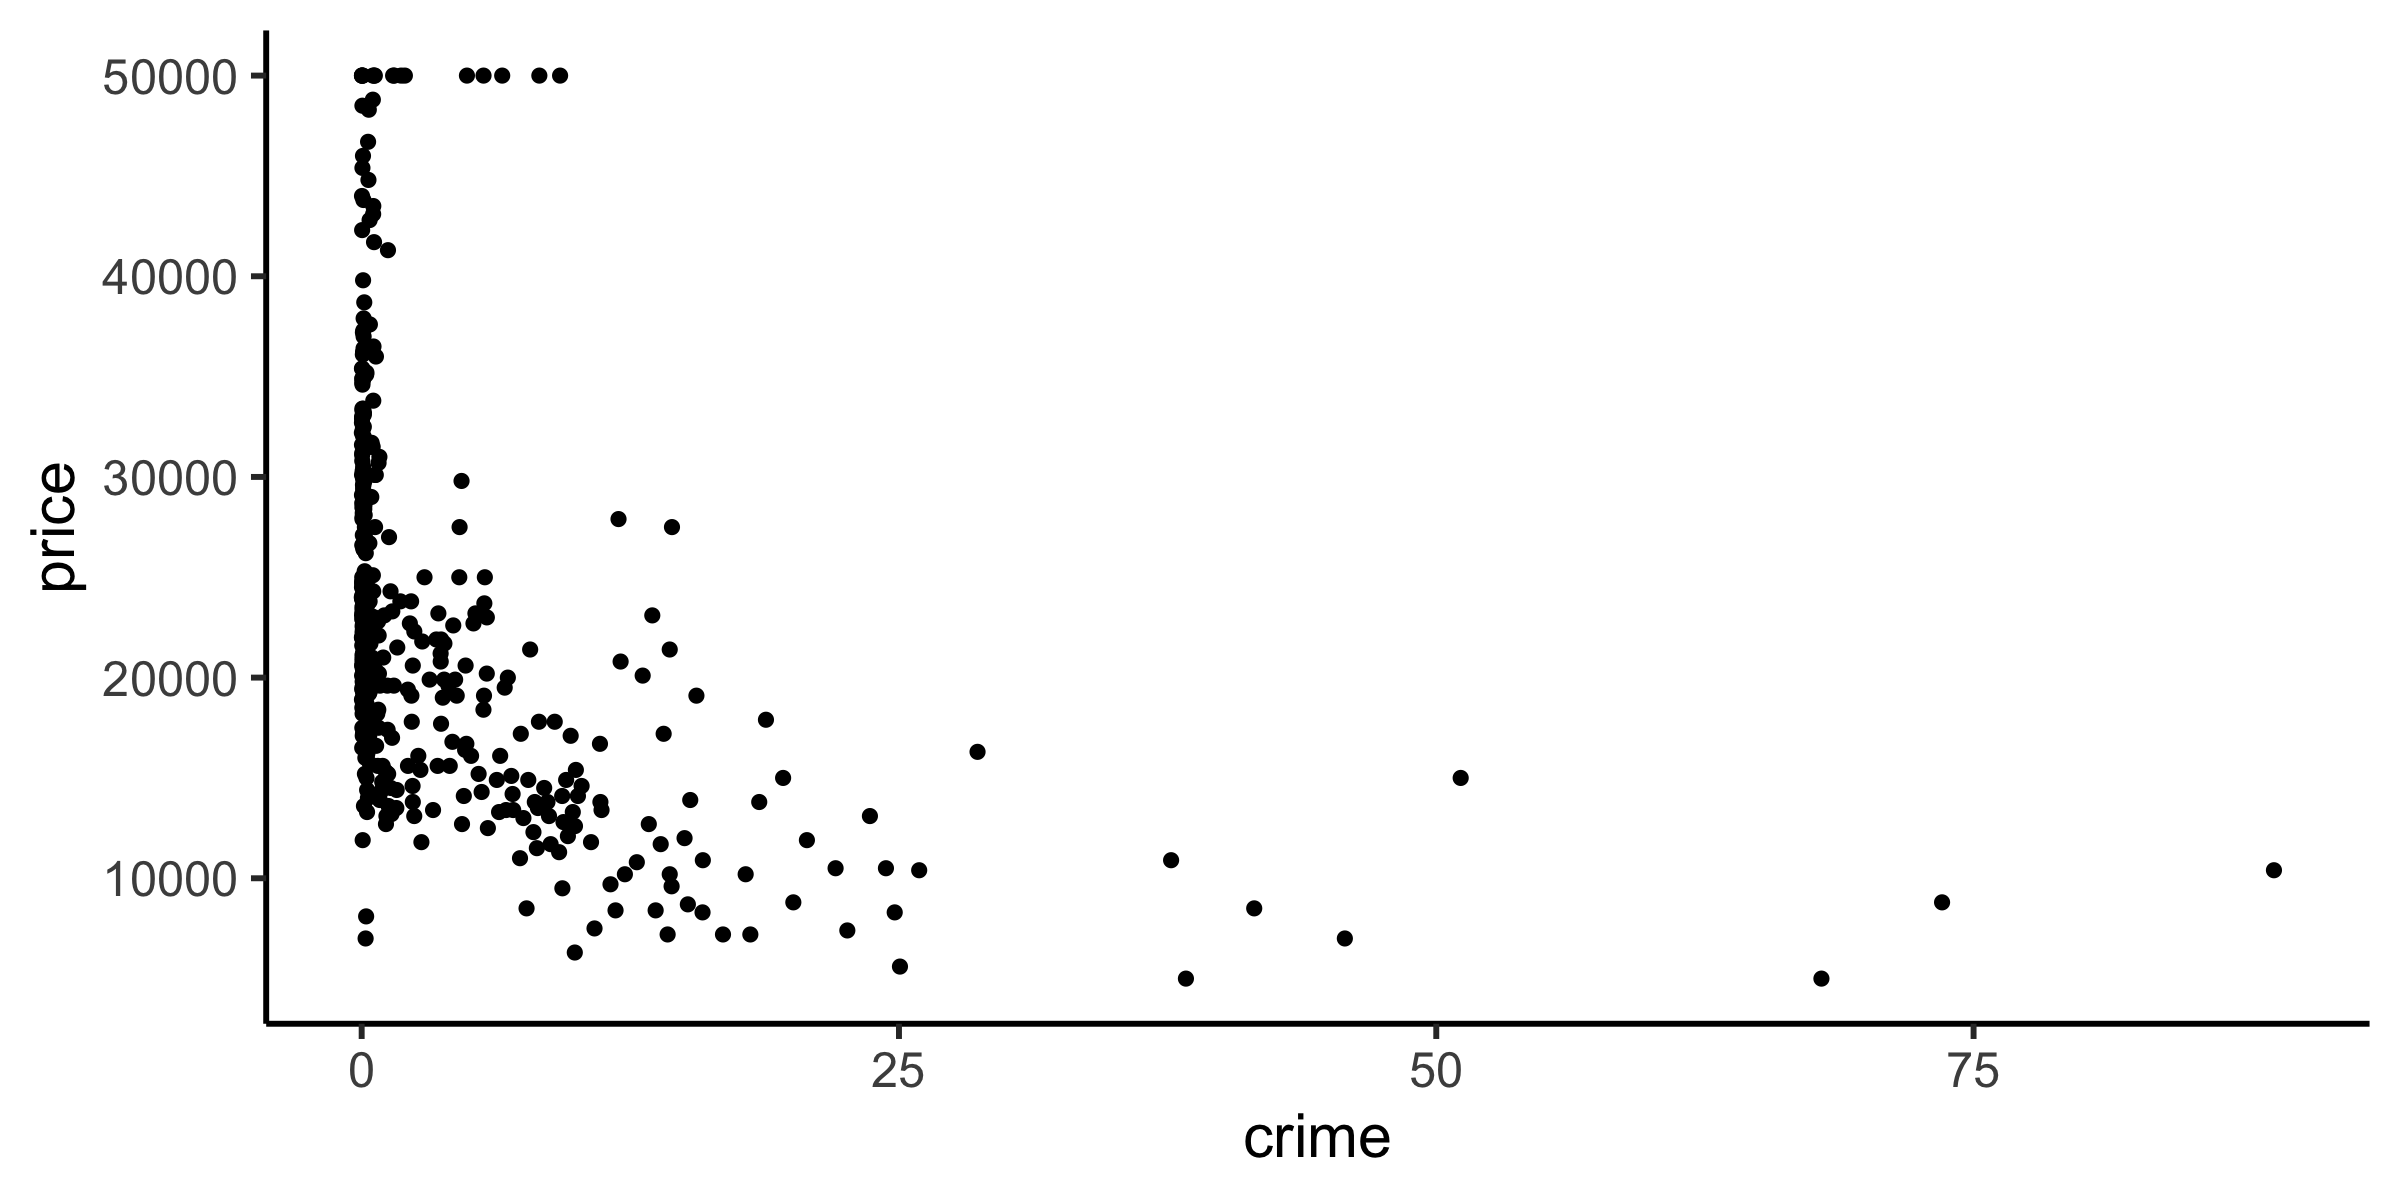

In [3]:
ggplot(boston, aes(y = price, x = crime)) +
  geom_point(size = 0.7) +
  theme_classic()

## 2.1 - Correllogram

**Specifications**

- Create a correllogram using the [`corrplot` package](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) of all the numeric variables in the `boston` dataset.
- You may use the `cor()` or a simialr function, but you should NOT calculate the correlations manually.
- Round your correlations to 2 significant figures.
- Ensure that you explore some of the options [available in the documentation](https://cran.r-project.org/web/packages/corrplot/vignettes/corrplot-intro.html) to customize your correllogram for this dataset.
- Ensure that there is no repeated or duplicated information in your correllogram (i.e. choose upper or lower triangle)

In [4]:
# Your code here

## 2.2 - Identifying Explanatory Variables

**Specifications**

- From the 13 available explanatory variables, select 6 that you would like to use for your multiple linear regression.
    - Remember, the **research question** is to predict the price response variable is `price` based on the explanatory variables.
- Provide a one-sentence rationale for why you chose each of the 6 variables for your analysis.


> Your answer here (select 6 variables and provide a rationale for why)

## 2.3 - Predicting Collinearity

**Specifications**

- Based on the correllogram you created in Question 2.1, list all **pairs of variables** that you predict are most likely to exhibit collinearity.

In [6]:
# Your code here (if necessary)

## 2.4 - Multiple Linear Regression


**Specifications**

- Run a Multiple Linear Regression on the 6 explanatory variables you selected in Q2.2 and use the `price` variable as the response variable.
- Save the model as `model1`, and produce two tibbles: one with the `regression_table()` and the other with the `fit_summary()`, similar to what was done in Class 5 and 6.

In [8]:
# Your code here

## 2.5 - Detecting multicollinearity

**Specifications**

- Using the method described in Class 5, manually calculate VIF values for all of your explanatory variables in the regression you did in Q2.4.
- Use the `vif()` function in the `car` package to confirm that your calculations are correct.
- Provide a few sentences of commentary explaining whether there is multi-collinearity present in your regression.

In [12]:
# Your code here

> Your answer here.

## 2.6 - Addressing multicollinearity

At the end of Class 5, you were provided three different strategies to deal with multicollinearity in Linear Regression analyses.
In this question, you will use the `boston` dataset to explore some options to address multicollinearity.

For this question, if the linear regression you did in Q2.4 and Q2.5 contains at least two variables with a VIF > 5, you may use the same same regression for this question.

If the linear regression you did in Q2.4 and Q2.5 did NOT contain any variables with VIF > 5, do another regression such that you have at least two (and no more than four) variables that have VIF > 5.

### 2.6.1 - Ignore multicollinearity

**Specifications**

- Interpret the regression analysis ($\beta$, standard error, p-value, test statistic, $R$, $R^2$, etc...) and comment on its suitability for prediction and for inference (separately).
- Would you bet on your model to help you guide your home buying decisions? Why or Why not?

In [14]:
# Your code here (if necessary)

> Your answer here

### 2.6.2 - Drop a collinear variable to resolve multicollinearity

**Specifications**

- Perform another multiple linear regression on the `boston` dataset **after** resolving multicollinearity by dropping one or two variables from your regression analysis.
- Compute VIF values for your new analysis and comment on the change (you may use the `car` package from now on).
- Carefully consider your threshold for dropping a variable and justify it.
- Compare your analysis to your previous one with multicollinearity.
- Comment on the suitability of this solution.

In [15]:
# Your code here

> Your answer here

### 2.6.3 - Transform collinear variables to resolve multicollinearity

**Specifications**

- Perform another multiple linear regression on the `boston` dataset **after** resolving multicollinearity by creating a new composite variable from a weighted combination of other collinear variables.
- Carefully consider your choices for the weighted average, and justify them.
- Compare your analysis to the original regression with multicollinearity.
- Comment on the suitability of this solution.

In [20]:
# Your code here

> Your answer here

### 2.7 - Reflection Questions

**Specifications**

- You should answer each question with about 3-5 sentences and your responses should be concise, substantial, thoughtful, and reflective.
- You should also demonstrate a thorough understanding of the concept or question.

#### 2.7.1 Comment on the ethical considerations of using some of the variables in this dataset

Hint: In particular, consider the implications of `black`, `highway`, `emp`, `crime` in a linear regression and what types of biases this may introduce in your regression analysis.

> Your answer here

#### 2.7.2 Explore the `black` variable in a bit more detail, and comment on the assumptions that were made when this dataset was put together.

Hint: In particular, I suggest starting with visualizing the function `1000(Bk - 0.63)^2`. What does it mean? What does it imply? Is it right/fair/just?

In [62]:
# Your code here

> Your answer here

#### 2.7.3 Critically consider the advice several textbooks give about multicollinearity

Hint: The advice that is typically given is that multicollinearity is "okay" for prediction scenarios, but should be addressed when doing inference and if interpretation of the coefficients is important.

> Your answer here

#### 2.7.4 Read the [origins of this dataset](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) and share your thoughts

Note: You may be tempted to adjust your answers to 2.6 after reading this article. Whether you do so or not, is your choice. Remember that this is a learning opportunity and our goal is to get you to think about some of the issues mentioned in the article *the next time* you do an analysis!

> Your answer here